# Business Experimentation and Causal Methods

## Assignment 2: Rocket Fuel

Sneha Ekka

Due Date: 12:30pm, February 6, 2024

__Instructions:__

Please read the case about RocketFuel from the HBS Case Pack.
For the assignment you need to read the Rocketfuel case, but answer the questions in the assignment. You can ignore the questions on the HBS website


__Important Tips:__

- Remember to write your name in the above markdown cell.

- Remember to write out your answers in words, don’t just output Python statistics.

- Before you submit the notebook, please make sure that the text is readable and does not spill over the right side of the screen. To prevent this from happening, make sure to write your verbal answer in the markdown blocks.
  
- The definitions for the columns in the data are in case! Please read them carefully.


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import modules and functions

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})

from statsmodels.stats.weightstats import ttest_ind # for t-test

# read data

ads_data = pd.read_csv('rocketfuel_data.csv')

ads_data

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14
...,...,...,...,...,...,...
588043,1496403,1,0,24,2,19
588044,1496404,1,0,199,6,19
588045,1496405,1,0,211,6,15
588046,1496406,1,0,98,5,19


In [2]:
# Checking the sample sizes of treatment and control groups
ads_data['test'].value_counts()

1    564530
0     23518
Name: test, dtype: int64

### 1. ATE and statistical significance.
#### 1.a What is the ATE (hat) of the ads on purchases (conversions)? 


In [3]:
# Your code here
trt_grp_size = len(ads_data[ads_data['test']==1])
ctr_grp_size = len(ads_data[ads_data['test']==0])

trt_mean = ads_data.loc[ads_data['test'] == 1, 'converted'].mean()
ctr_mean = ads_data.loc[ads_data['test'] == 0, 'converted'].mean()

ATE_hat = trt_mean - ctr_mean

print("Treatment Size:", trt_grp_size, "\t Treatment Average (conversion rate):", trt_mean)
print("Control Size:", ctr_grp_size, "\t Control Average (conversion rate):", ctr_mean)
print("The ATE (hat) of the Ads on purchases (conversions) =", np.round(ATE_hat,5))

Treatment Size: 564530 	 Treatment Average (conversion rate): 0.025548686517988414
Control Size: 23518 	 Control Average (conversion rate): 0.01785866145080364
The ATE (hat) of the Ads on purchases (conversions) = 0.00769


**Answer 1.a** 

With a treatment size of 564,530 and a control size of 23,518, the average conversion rates were 0.02554 and 0.01786, respectively. The estimated Average Treatment Effect (ATE) is 0.00769, indicating a small but positive impact of ads on purchases for TaskaBella's new handbag. Essentially, the treatment group, exposed to ads, showed a higher average purchase rate compared to the control group with no ads.

#### 1.b Did the campaign cause more purchases? Is this difference statistically significant? 
Hint: Use the t.test function. For example, the code below conducts a t-test on the number of impressions.

In [4]:
# tstat, pvalue, df = ttest_ind(ads_data.loc[ads_data['test'] == 1, 'tot_impr'], 
#                               ads_data.loc[ads_data['test'] == 0, 'tot_impr'],
#                               alternative = 'two-sided', usevar = 'pooled', value = 0)

# print(f"t-score (t): {tstat}")
# print(f"P-value (p): {pvalue}")

Modify the function above to get the right answer. Your answer in the code chunk below.

In [5]:
# Your code here
tstat, pvalue, df = ttest_ind(ads_data.loc[ads_data['test'] == 1, 'converted'], 
                              ads_data.loc[ads_data['test'] == 0, 'converted'],
                              alternative = 'two-sided', usevar = 'pooled', value = 0)

print(f"t-score (t): {tstat}")
print(f"P-value (p): {pvalue}")

t-score (t): 7.366841436877127
P-value (p): 1.7494498980941505e-13


**Answer 1.b** 

The estimated Average Treatment Effect (ATE hat) of 0.00769 is small but statistically significant as indicated by a high t-score of 7.3668 and a very low p-value of 1.75e-13 (< 0.05). Hence, there is strong evidence that the observed difference in purchase rates is not random, and that the campaign caused more purchases.

### 2. Was the campaign profitable?
#### 2.a How much more profit did TaskaBella make by running the campaign (excluding advertising costs) ?
Hint: the profit per conversion is given on page 2 of the case.

In [6]:
profit_per_conversion = 40  # in dollars

profit = ATE_hat * trt_grp_size * 40

print("The profit of the Ad Campaign is: $", np.round(profit,2))

The profit of the Ad Campaign is: $ 173649.99


**Answer 2.a** 

The campaign demonstrated profitability, yielding approximately `$`173,650 in profit for TaskaBella.

#### 2.b What was the cost of the campaign (including the control group)?  
Hint: The cost per thousand impressions is $9

In [7]:
cost_per_1000_imp = 9  # in dollars

cost_of_campaign = (sum(ads_data['tot_impr']) / 1000) * 9

print("Cost of the campaign is: $", np.round(cost_of_campaign, 2))

Cost of the campaign is: $ 131385.8


**Answer 2.b** 

TaskaBella incurred a campaign cost of around `$`131,385 considering a cost of `$`9 per thousand impressions.

#### 2.c Calculate the ROI of the campaign (including the control group). Was the campaign profitable?  
The ROI is calculated by 
$$\text{ROI} = \frac{\text{Effect on Profits per Person in Campaign} - \text{Cost of Ads per Person in Campaign}}{\text{Cost of Ads per Person in Campaign}}$$

In [18]:
# ROI = (Effect on profit per person - Cost of campaign per person) / Cost of campaign per person

num_users = len(ads_data)
effect_on_profit_pp = profit/num_users
cost_of_campaign_pp = cost_of_campaign/num_users

ROI = (effect_on_profit_pp - cost_of_campaign_pp) / cost_of_campaign_pp

print("ROI of the campaign is:", np.round(ROI,2))

ROI of the campaign is: 0.32


**Answer 2.c** 

The Return on Investment (ROI) for the campaign, including both groups, is approximately 32%. It's important to note that this ROI does not consider the fixed costs associated with setting up the campaign. Despite this limitation, a positive ROI indicates that the campaign generated a favorable return relative to its costs.

#### 2.d What was the opportunity cost of including a control group --- how much more could TaskaBella have made by not having a control group at all? 

In [9]:
opportunity_cost = ATE_hat * ctr_grp_size * 40

print("The opportunity cost of including a control group is: $", np.round(opportunity_cost,2))

The opportunity cost of including a control group is: $ 7234.16


**Answer 2.d** 

The opportunity cost incurred by including a control group amounts to `$`7,234. This represents the potential additional profit TaskaBella could have attained if there was no control group, indicating that the presence of the control group led to a missed opportunity for an extra `$`7,234 in profit.

### 3. Did the number of impressions seen by each user influence the effectiveness of advertising?

#### 3.a Plot the conversion rate by treatment group and by the number of impressions seen by users. 

**Answer 3.a**

In [10]:
# Useful code for creating bins (modify as you like)
# bins = pd.IntervalIndex.from_tuples([(0,100), (100,500), (500, 10000)])

bins = pd.IntervalIndex.from_tuples([(0,20), (20,40), (40,60), (60,80), (80,100), (100,500), (500,2500)])

ads_data['group_tot_impr'] = pd.cut(ads_data['tot_impr'], bins).astype(str)

In [11]:
conv_rate = pd.DataFrame(ads_data.loc[ads_data['test'] == 1].groupby('group_tot_impr', sort=False, as_index=False)['converted'].mean())
conv_rate.rename(columns={'group_tot_impr':'bins','converted':'conversion_rate'}, inplace=True)
conv_rate['conversion_rate'] = conv_rate['conversion_rate'] * 100
conv_rate.sort_values(by='conversion_rate', inplace=True)
conv_rate

,bins,conversion_rate
4,"(0, 20]",0.496004
2,"(20, 40]",2.322632
5,"(40, 60]",6.707023
6,"(60, 80]",12.003659
1,"(80, 100]",15.841679
0,"(100, 500]",17.123447
3,"(500, 2500]",17.460317


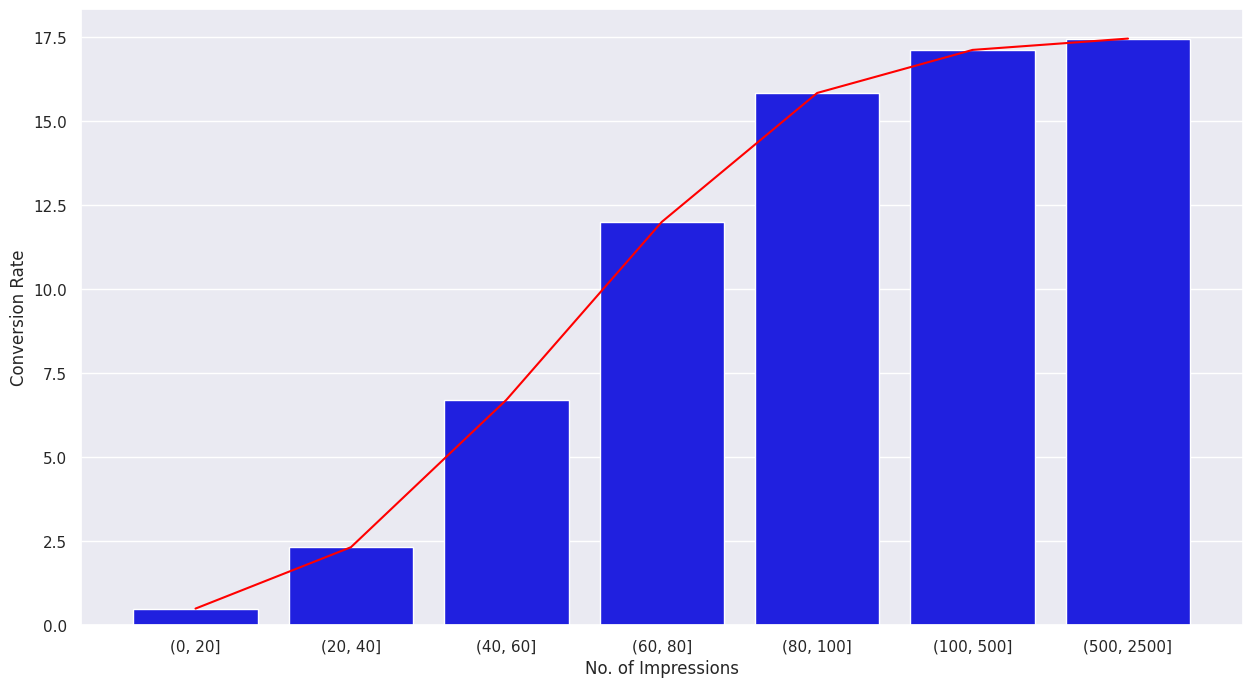

In [12]:
import matplotlib.pyplot as plt

ax = sns.barplot(x='bins', y='conversion_rate', color='blue', data=conv_rate)
sns.lineplot(x='bins', y='conversion_rate', color='red', data=conv_rate, ax=ax)

plt.xlabel("No. of Impressions")
plt.ylabel("Conversion Rate")
plt.show();

#### 3.b Based on the above figure, can we say that more impressions cause more conversions? (No more than 2 sentences)

**Answer 3.b** 

From the above graph we can easily observe that the conversion rate increases with the number of impressions encountered by the users in the treatment group. The conversion rate increases sharply between 0-100 impressions and eventually plateaus for users who encountered 100+ impressions. This suggests a positive relationship between the number of impressions and conversions.

### 4 Calculate the power of this experiment.

#### 4.a Calculate Cohen’s D. Cohen’s D, in this case, is the estimated average treatment effect on conversion divided by the standard deviation of conversion.

In [13]:
cohens_d = ATE_hat / ads_data['converted'].std()

print("Cohen's D is:", np.round(cohens_d,4))

Cohen's D is: 0.049


**Answer 4.a** 

A Cohen's D of 0.049 signifies a modest effect size, suggesting that running the campaign had a small but measurable impact on conversions. 

#### 4.b Use the `power_ttest2n` function in `pingouin` to calculate the power of the experiment. 
Note, this is very similar to the TTestPower function you've been shown previously, but this one also allows for treatment arms of a different size.

In [14]:
##  requirements: pingouin-0.5.4
# from pingouin import power_ttest2n

# cohens_d = 0.05 #(modify this value as you like)
# power = power_ttest2n(nx = 100, ny = 100, d = cohens_d, 
#                       alpha = 0.05, alternative = 'two-sided')
# power

In [15]:
from pingouin import power_ttest2n

power = power_ttest2n(nx = trt_grp_size, ny = ctr_grp_size, d = cohens_d, 
                      alpha = 0.05, alternative = 'two-sided')

print("Power of the experiment =", power)

Power of the experiment = 0.9999999678715827


**Answer 4.b** 

Given the treatment and control group sizes, an effect size of 0.049 (Cohen's D), and an alpha of 0.05, the calculated Power of the experiment is exceptionally high at 0.9999. This indicates a high probability to reject the null hypothesis, affirming that the treatment has a significant and detectable impact on conversions.

#### 4.c What would the power be instead if the true effect had a cohen's D of .01?

In [16]:
new_cohens_d = 0.01

new_power = power_ttest2n(nx = trt_grp_size, ny = ctr_grp_size, d = new_cohens_d, 
                          alpha = 0.05, alternative = 'two-sided')

print("Power of the experiment with Cohen's D as 0.01 =", new_power)

Power of the experiment with Cohen's D as 0.01 = 0.3239638495586871


**Answer 4.c** 

Reducing the effect size from 0.049 to 0.01 while maintaining the same sample sizes and alpha level results in a notable decrease in the Power of the experiment. The Power drops to 0.32, diminishing the probability of rejecting the null hypothesis and making it challenging to support the alternative hypothesis.

#### 4.d What would the power be instead if the true effect had a cohen's of .01 and the sample was equally split between treatment and control?

In [17]:
from pingouin import power_ttest

equal_sample_power = power_ttest(n=len(ads_data)/2, d = new_cohens_d, alpha = 0.05, alternative = 'two-sided')

print("Power of the experiment with Cohen's D as 0.01 and equal sample split =", equal_sample_power)

Power of the experiment with Cohen's D as 0.01 and equal sample split = 0.969551612370692


**Answer 4.d** 

Equalizing the sample sizes and maintaining a small effect size of 0.01, the Power of the experiment notably increases to 0.9695 and once again indicates a strong confidence in supporting the alternative hypothesis that the treatment has a significant impact on the conversions.

### 5. Case Discussion in Class
Please write what you would discuss in your presentation to TaskaBella. Your answer should be one paragraph and the paragraph should be five or fewer sentences. Be prepared to discuss in class. Think about what is the most important thing to say to TaskaBella. 
No additional analysis is needed to answer this question.

**Answer 5**

In the campaign analysis, we found a statistically significant positive impact on user conversions, with an estimated average treatment effect of 0.00769. The campaign generated a substantial profit of `$`173,649, surpassing the campaign cost of `$`131,385 and yielding a commendable ROI of 32%. The high power of 0.999 further validates the effectiveness of the advertisements in driving conversions. In light of these compelling results, I recommend TaskaBella to continue showcasing these advertisements to all users, as the evidence suggests a successful and impactful campaign.

### How long did this problem set take you in hours? How did you find the level of difficulty?


It took me roughly 7 hours at a stretch to complete the problem set along with the explainations. The level of difficulty of the questions were a bit challenging given that most of them weren't straightforward/solved in class and also involved in-depth concepts/interpretations that I found myself grappling with.